<a href="https://colab.research.google.com/github/mindgarage/very-deep-learning-wise2324/blob/main/exercises/Exercise_2(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Exercise 2(5): Depthwise Separable Convolutions

## Very Deep Learning (VDL) - Winter Semester 2023/24

---

### Group Details:

- **Group Name:** \[Enter OLAT Group Name Here\]

### Members:

- \[Participant 1 Name\], \[Matrikel-Nr 1\]
- \[Participant 2 Name\], \[Matrikel-Nr 1\]
- ...

---

**Instructions**: The tasks in this notebook are a part of Sheet 2. Look for `TODO` tags throughout the notebook and complete the sections with missing code. Once done, ensure all outputs are visible and correctly displayed. Save your notebook and submit the `.ipynb` file together with the exercise sheet PDF in a single ZIP file.

### Define imports

In [ ]:
# Define necessary imports
import torch
from torch import nn,save,load
from torch.utils.data import DataLoader
from torch.optim import Adam
from torchvision import datasets
from torchvision.transforms import ToTensor

### Download the data and define the Dataloader

In [ ]:
# Download the dataset
train_dataset = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_dataset = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())

# Define corresponding Data Loaders
train = DataLoader(train_dataset, batch_size=32, shuffle=True)
test = DataLoader(test_dataset, 32)

### Convolutional Neural Network

**Definition:** Convolutional neural networks are a specialized type of artificial neural networks that use a mathematical operation called convolution in place of general matrix multiplication. They are specifically designed to process pixel data and are used in image recognition and processing. (source wikipedia)

**Pooling:**  Pooling is a technique to down sample feature maps by summarizing the presence of features in patches of the feature map. They can be various types such as maxpooling, average pooling etc. It decreases the number of parameters and therefor the necessary computation.



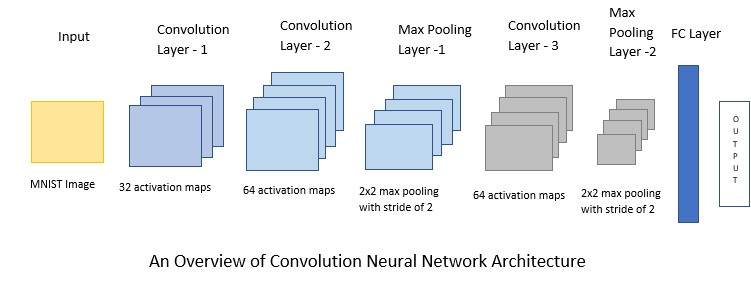

#### **Task**

Create a Neural Network model as shown in the above image to train MNIST dataset.

*Convolution operation*

> Note that each convolution operation must be followed by a **ReLU activation**. Please use a **3x3 kernal for convolution** operation. Assume the zero padding and a stride of 1 for convolution operations.


*Pooling operation*

> Also assume zero padding for pooling operation. Rest of the necessary infomation (parameters) for pooling are described in the above image.





One need not code for FC (Fully Connected Layer and output) as it is already mentioned in the below code.

In [ ]:
# TODO: Complete the below network
class ImageClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(



        nn.Flatten(),
        nn.Linear(64*5*5, 10)
    )
  def forward(self, x):
    return self.model(x)



### Summary of the model

Its time to explore the **output shape** of each layer and the **number of parametres** that we obtain from each layer of the Neural Network. At present there are two options to print the summary of your model.

*Option 1:* Use torchsummary package [corresponding git repo](https://github.com/sksq96/pytorch-summary)

*Option 2:* Use torchinfo package. [corresponding git repo](https://github.com/TylerYep/torchinfo)

#### **Task**

Use one of the above options to print the your model summary as output.

In [ ]:
# TODO: write code to print summary of your model.
# If you are stuck, please check your input data size format and also the device (cpu/gpu) your data is loaded into.


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Define training and evaluation

In [ ]:
# Training
'''
classifier (model), loss function and optimiser must be passed as an argument
'''
def train_epoch(clf, loss_fn, opt):
  no_epochs = 15
  for epoch in range(no_epochs):
    for batch in train:
      X, y = batch
      X, y = X.to(device), y.to(device)
      # predict
      y_hat = clf(X)
      #loss
      loss = loss_fn(y_hat, y)
      #back prop steps
      opt.zero_grad()
      loss.backward()
      # update
      opt.step()
    print(f"Epoch:{epoch+1} loss is {loss.item()}")



In [ ]:
# Evaluation
'''
classifier (model) and loss function must be passed as an argument.
It returns accuracy of the model.
'''
def eval(clf, loss_fn):
  total_accuracy = 0.0
  for batch in test:
      X, y = batch
      X, y = X.to(device), y.to(device)
      y_hat = clf(X)
      loss = loss_fn(y_hat, y)
      total_accuracy += (y_hat.max(dim=1)[1] == y).sum().item();
  return total_accuracy / len(test.dataset)

### Perform training and evaluation

In [ ]:
# Train and evaluate the model that uses standard convolution operations
# on MNIST Dataset.

clf = ImageClassifier().to(device)
loss_fn = nn.CrossEntropyLoss()
opt= Adam(clf.parameters(), lr=1e-3)

train_epoch(clf, loss_fn, opt)
accuracy = eval(clf, loss_fn)
print("\nAccuracy of the model that uses standard convolution operations:", accuracy*100)



### **Depthwise Separable Convolution**

It is composed of two steps:

> First perform **Depthwise convolution**, it means applying a single convolutional filter per each input channel. Then perform **Pointwise convolution**, it means to create a linear combination of the output of the depthwise convolution.

**Task:**

Modify the above model (ImageClassifier) that uses Standard 2D Convolution to Depthwise Separable Convolution.


hint: a) use groups parameter to achieve Depthwise convolution, b) use 1x1 size kernel to achieve Pointwise convolution.



In [ ]:
# TODO: Complete the below model with Depthwise separable convolutions
class ImageClassifierDepthwiseSeparable(nn.Module):
  def __init__(self):
    super().__init__()
    self.model = nn.Sequential(







        nn.Flatten(),
        nn.Linear(64*5*5, 10)
    )
  def forward(self, x):
    return self.model(x)

### Summary of your new model.


In [ ]:
# TODO write code to print summary of the new model.



In [ ]:
# Depthwise separable convolution
clf_new = ImageClassifierDepthwiseSeparable().to(device)
loss_fn = nn.CrossEntropyLoss()
opt= Adam(clf_new.parameters(), lr=1e-3)

train_epoch(clf_new, loss_fn, opt)
depthwise_sep_acc = eval(clf_new, loss_fn)
print("Accuracy of new model with Depthwise separable convolution operationst:", depthwise_sep_acc*100)

### Analysing the two models.

#### **Task**

**TODO:** Answer the below questions:


1) The total number of parameters present in first model (ImageClassifier) are ??


2) The total number of parameters present in new  model (ImageClassifierDepthwiseSeparable) are ??



The first model that uses **Standard convolutions has more number of parameters compared to the new model with Depthwise separable convolution**s for the same neural network architecture that is trained on MNIST dataset to classify images from zero to nine.

Thus Depthwise separable is computationally efficient and also it prevents the model from overfitting.